# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [19]:
#1.a
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [20]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


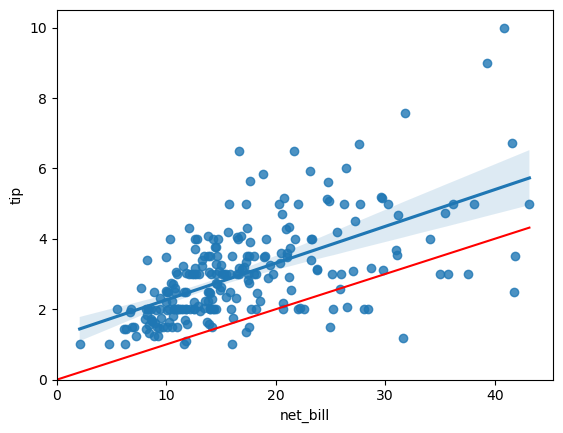

In [21]:
#1.b
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

x = np.linspace(0,tips['net_bill'].max(), 100)
y = .1*x

plt.plot(x, y, '-r')

plt.xlim(left = 0)
plt.ylim(bottom = 0);

In [22]:
reg = smf.ols('tip ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           5.02e-23
Time:                        16:49:35   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [23]:
reg1 = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           1.52e-06
Time:                        16:49:35   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

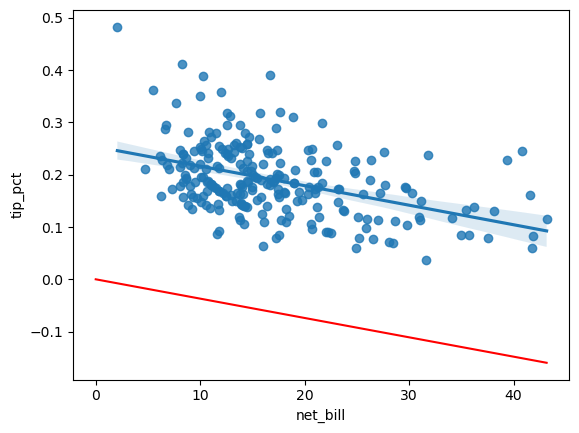

In [24]:
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])

x = np.linspace(0,tips['net_bill'].max(),100)
y = -0.0037*x

plt.plot(x, y, '-r');

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

No primeiro gráfico, a regressão de 'tip' em função de 'net_bill' tem alpha positivo, assim, quanto maior a conta, maior a gorjeta.
No segundo gráfico a regressão de 'tip_pct' em função de 'net_bil' tem alpha negativo, assim, quanto maior a conta, menor a porcentagem da gorjeta.

O R² não pode ser comparado diretamente entre diferentes modelos, pois ele depende do modelo e dos dados utilizados, podendo ser afetado por fatores como a escala das variáveis e a presença de outliers. Portanto, não é possível determinar qual modelo é "melhor" apenas com base no R², sendo necessário avaliar outros aspectos

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [25]:
#4.1
tips['pred'] = reg1.fittedvalues
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,pred
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,0.207087
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,0.251951
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,0.197684
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,0.180107
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,0.176358


In [26]:
#4.2
reg2 = smf.ols('tip ~ net_bill * tip_pct', data = tips).fit()
tips['pred_tips'] = reg2.fittedvalues
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,pred,pred_tips
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,0.207087,1.01
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,0.251951,1.66
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,0.197684,3.50
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,0.180107,3.31
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,0.176358,3.61


In [33]:
#4.3
reg2.rsquared

1.0

In [ ]:
#4.4

O valor de R² para "reg" foi de 0.3325, indicando que apenas 33.25% da variação em "tip" pode ser explicada pela variável "net_bill". Já o valor de R² para "reg2" foi de 1.0, indicando que o modelo é capaz de explicar 100% da variação em "tip".